Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


In [3]:
#Change dir to project drive
root_path = '/content/gdrive/My Drive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration'

In [ ]:
#from google.colab import files #upload .zip file from local directory to colab drive
#files.upload()

In [ ]:
#!unzip /content/gdrive/My\ Drive/dataset/CNN_Skin_Assignment/CNN_assignment.zip -d /content/gdrive/My\ Drive/dataset/CNN_Skin_Assignment

Archive:  /content/gdrive/My Drive/dataset/CNN_Skin_Assignment/CNN_assignment.zip
replace /content/gdrive/My Drive/dataset/CNN_Skin_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/My Drive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/gdrive/My Drive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [5]:
#Print the count of image available at each folders
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
                                  data_dir_train,
                                  seed=123,
                                  validation_split = 0.2,
                                  subset = "training",
                                  image_size = (img_height, img_width),
                                  batch_size=batch_size)

Found 6972 files belonging to 9 classes.
Using 5578 files for training.


In [ ]:
train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
                                  data_dir_train,
                                  seed=123,
                                  validation_split = 0.2,
                                  subset = "validation",
                                  image_size = (img_height, img_width),
                                  batch_size=batch_size)

Found 6972 files belonging to 9 classes.
Using 1394 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
#print(class_names)
print(*class_names, sep = "\n")

actinic keratosis
basal cell carcinoma
dermatofibroma
melanoma
nevus
pigmented benign keratosis
seborrheic keratosis
squamous cell carcinoma
vascular lesion


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

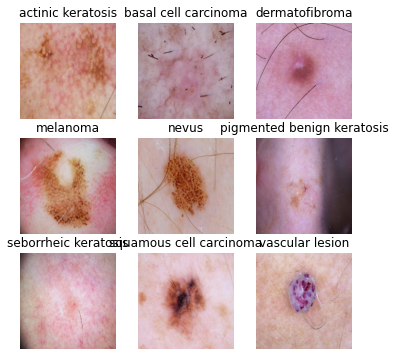

In [ ]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

# plotting some random 1 images from each class

plt.figure(figsize = (6,6))
for i in range(len(class_names)):
    filtered_ds = train_ds.filter(lambda x, l: tf.math.equal(l[0], i))
    for image, label in filtered_ds.take(1):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(image[0].numpy().astype('uint8'))
        plt.title(class_names[label.numpy()[0]])
        plt.axis('off')

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model - 0, Basic layer
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here
num_class = 9
model = Sequential([
    layers.Rescaling(scale = 1./255, input_shape = (img_height,img_width,3)),
    layers.Conv2D(16,3,padding='same',activation= 'relu'),
    layers.Conv2D(32,3,padding='same',activation= 'relu'),
    layers.Conv2D(64,3,padding='same',activation= 'relu'),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_class,activation='softmax')
])


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 180, 180, 64)      18496     
                                                                 
 flatten (Flatten)           (None, 2073600)           0         
                                                                 
 dense (Dense)               (None, 128)               265420928 
                                                                 
 dense_1 (Dense)             (None, 9)                 1

### Train the model

In [ ]:
epochs = 20
history = model.fit(  train_ds,
                      validation_data = val_ds,
                      epochs=epochs
                    )

Epoch 1/20
62/62 [==============================] - 533s 3s/step - loss: 8.8762 - accuracy: 0.1901 - val_loss: 2.0088 - val_accuracy: 0.2429
Epoch 2/20
62/62 [==============================] - 9s 147ms/step - loss: 1.8729 - accuracy: 0.3488 - val_loss: 1.7933 - val_accuracy: 0.3603
Epoch 3/20
62/62 [==============================] - 9s 147ms/step - loss: 1.5968 - accuracy: 0.4388 - val_loss: 1.6344 - val_accuracy: 0.4231
Epoch 4/20
62/62 [==============================] - 9s 148ms/step - loss: 1.4913 - accuracy: 0.4626 - val_loss: 1.5680 - val_accuracy: 0.4109
Epoch 5/20
62/62 [==============================] - 9s 149ms/step - loss: 1.4075 - accuracy: 0.5273 - val_loss: 1.5240 - val_accuracy: 0.4514
Epoch 6/20
62/62 [==============================] - 9s 148ms/step - loss: 1.2612 - accuracy: 0.5667 - val_loss: 1.4442 - val_accuracy: 0.5101
Epoch 7/20
62/62 [==============================] - 9s 149ms/step - loss: 1.0956 - accuracy: 0.6325 - val_loss: 1.5363 - val_accuracy: 0.4858
Epoch 8

### Visualizing training results

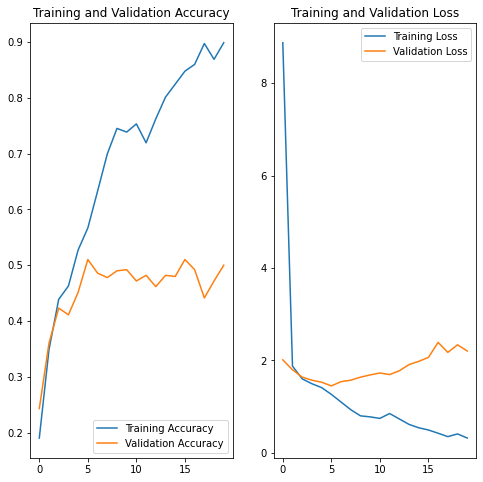

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here
**Ans**:**Model is Overfitting**, where training accuracy is high with 89% but, fails in validation of unseen data of 50% accuracy.It clearly indicating model is memories the samples during trainig and fails at unseen validation data.

Next, add augmentation to avoid overfitting & optimize the model building


In [11]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])


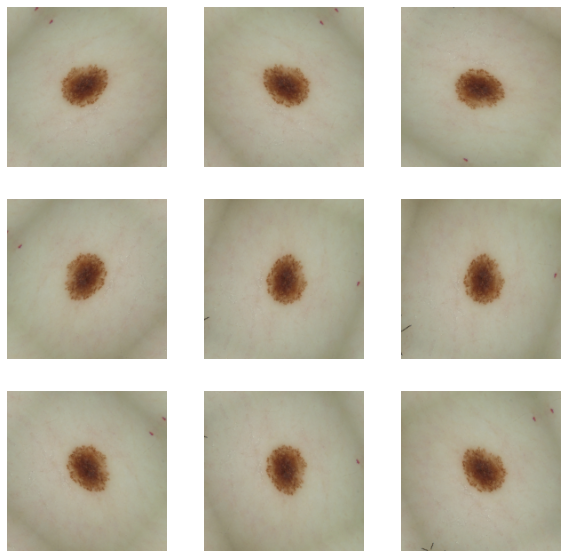

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
# Visualize one of the augmented images
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):   
    for i in range(9):
        augmented_images = data_augmentation(images,training = True)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[1].numpy().astype("uint8"))
        plt.axis("off")

### Todo: Model 1, with augmentation
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
## Your code goes here

num_class = 9
model1 = Sequential([
    data_augmentation,
    layers.Rescaling(scale = 1./255, input_shape = (img_height,img_width,3)),
    layers.Conv2D(16,3,padding='same',activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(32,3,padding='same',activation= 'relu'),
    layers.Conv2D(64,3,padding='same',activation= 'relu'),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_class,activation='softmax')
])

### Compiling the model

In [ ]:
## Your code goes here
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history1 = model1.fit(  train_ds,
                      validation_data = val_ds,
                      epochs=epochs
                    )

Epoch 1/20
62/62 [==============================] - 6s 78ms/step - loss: 4.1506 - accuracy: 0.2002 - val_loss: 2.0109 - val_accuracy: 0.2085
Epoch 2/20
62/62 [==============================] - 4s 70ms/step - loss: 1.8831 - accuracy: 0.2877 - val_loss: 1.6815 - val_accuracy: 0.4028
Epoch 3/20
62/62 [==============================] - 4s 70ms/step - loss: 1.7185 - accuracy: 0.3610 - val_loss: 1.5329 - val_accuracy: 0.4453
Epoch 4/20
62/62 [==============================] - 4s 70ms/step - loss: 1.5084 - accuracy: 0.4540 - val_loss: 1.4941 - val_accuracy: 0.4960
Epoch 5/20
62/62 [==============================] - 4s 70ms/step - loss: 1.5148 - accuracy: 0.4601 - val_loss: 1.5432 - val_accuracy: 0.4453
Epoch 6/20
62/62 [==============================] - 5s 80ms/step - loss: 1.4486 - accuracy: 0.4889 - val_loss: 1.5349 - val_accuracy: 0.4555
Epoch 7/20
62/62 [==============================] - 4s 70ms/step - loss: 1.4403 - accuracy: 0.4798 - val_loss: 1.4386 - val_accuracy: 0.5182
Epoch 8/20
62

In [ ]:
# View the summary of all layers
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 90, 90, 16)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                      

### Visualizing the results

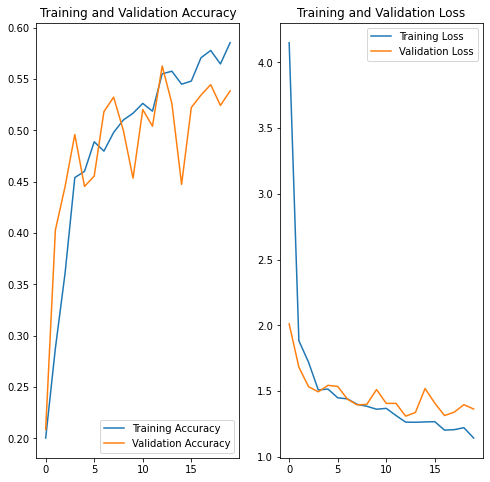

In [ ]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?
**Ans**: **Model is underfit**, compare to previous model result, Training and validation accuracy of this model is moreover equal but, accuracy rate is reduced to minimum. It clearly indicate model is not memorize from training data and work well with respect to unseen data, problem is with low accuracy so model won't perform good becasue of low average in predicting the samples.

Next, try to optimize model using augmentor to avoid imbalance in class sample.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<BarContainer object of 9 artists>

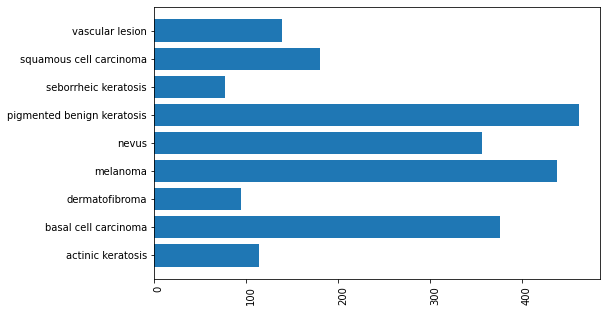

In [12]:
## Your code goes here.
plt.figure(figsize=(8, 5))
plt.xticks(rotation=90, ha="left")
plt.barh(y=class_names,width=[len(list(data_dir_train.glob(c+'/*.jpg'))) for c in class_names])

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
**Ans**: **Seborrheic keratosis** is least from other 8 class, contains less than 100 sample images and least from other classes.
#### - Which classes dominate the data in terms proportionate number of samples?
**Ans**: **Pigmented benign keratosis** is contains largest samples around 450+ from other class. which is high influence the model by plenty samples.


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [13]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [38]:
path_to_training_dataset= "/content/gdrive/My Drive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(str(path_to_training_dataset) + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [15]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4870


### Lets see the distribution of augmented data after adding new images to the original training data.

In [16]:
aug_path = os.path.join(data_dir_train, '*','output', '*.jpg')
ori_path = os.path.join(data_dir_train, '*/','*.jpg')

#data_dir_train.glob('*/*.jpg'
print(aug_path) #augmentor training path with inclusion for 500 samples
print(ori_path) # original training patht

/content/gdrive/My Drive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/*/output/*.jpg
/content/gdrive/My Drive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/*/*.jpg


In [17]:
import glob
path_list_new = [x for x in glob.glob(aug_path)]
path_list_ori = [x for x in glob.glob(ori_path)]
#path_list_new

In [18]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(aug_path)]
lesion_list_ori = [os.path.basename(os.path.dirname(y)) for y in glob.glob(ori_path)]
#lesion_list_ori

In [19]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))
dataframe_dict_ori = dict(zip(path_list_ori, lesion_list_ori))

In [20]:
original_df = pd.DataFrame(list(dataframe_dict_ori.items()),columns = ['Path','Label'])

In [21]:
original_df['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

In [22]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [23]:
new_df['Label'].value_counts()


actinic keratosis             984
pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

<BarContainer object of 9 artists>

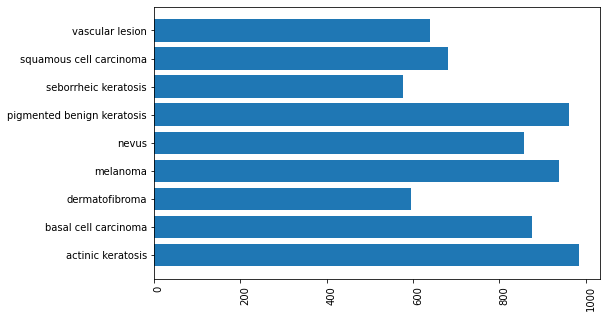

In [24]:
plt.figure(figsize=(8, 5))
plt.xticks(rotation=90, ha="left")
plt.barh(y=class_names,width=[len(list(data_dir_train.glob(c+'/*.jpg'))) + len(list(data_dir_train.glob(c+'/output/*.jpg'))) for c in class_names])

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [25]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [26]:
#data_dir_train="path to directory with training data + data created using augmentor"
data_dir_train = pathlib.Path("/content/gdrive/My Drive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",  ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7109 files belonging to 9 classes.
Using 5688 files for training.


In [ ]:
train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

#### **Todo:** Create a validation dataset

In [27]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation', ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7109 files belonging to 9 classes.
Using 1421 files for validation.


#### **Todo:** Create your model - 2 (make sure to include normalization)

In [34]:
## your code goes here
from tensorflow.keras.layers import Dense, BatchNormalization

#Based on instruction, no dropout, no augmentation layer, no batch normalize. added for testing purpose for hyperparameter
num_class = 9
model2 = Sequential([
    #data_augmentation,
            #BatchNormalization(),
    layers.Rescaling(scale = 1./255, input_shape = (img_height,img_width,3)),
    layers.Conv2D(16,3,padding='same',activation= 'relu'),
    #layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation= 'relu'),
    #     layers.MaxPooling2D(),
    # layers.Dropout(0.2),
    layers.Conv2D(64,3,padding='same',activation= 'relu'),
    # layers.MaxPooling2D(),
    # layers.Dropout(0.2),
    layers.Conv2D(128,3,padding='same',activation='relu'),
    #     layers.MaxPooling2D(),
    # layers.Dropout(0.2),
      layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_class,activation='softmax')
])

#### **Todo:** Compile your model - 2 (Choose optimizer and loss function appropriately)

In [35]:
## your code goes here
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [36]:
epochs = 30
## Your code goes here, use 50 epochs.
history2 = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
178/178 [==============================] - 78s 428ms/step - loss: 2.2492 - accuracy: 0.3805 - val_loss: 1.3883 - val_accuracy: 0.5011
Epoch 2/30
178/178 [==============================] - 54s 299ms/step - loss: 1.2295 - accuracy: 0.5561 - val_loss: 1.1116 - val_accuracy: 0.6059
Epoch 3/30
178/178 [==============================] - 53s 290ms/step - loss: 0.9037 - accuracy: 0.6800 - val_loss: 0.9689 - val_accuracy: 0.6510
Epoch 4/30
178/178 [==============================] - 53s 292ms/step - loss: 0.7167 - accuracy: 0.7486 - val_loss: 0.9839 - val_accuracy: 0.6953
Epoch 5/30
178/178 [==============================] - 56s 309ms/step - loss: 0.5175 - accuracy: 0.8210 - val_loss: 0.9003 - val_accuracy: 0.7438
Epoch 6/30
178/178 [==============================] - 56s 308ms/step - loss: 0.3876 - accuracy: 0.8706 - val_loss: 0.9417 - val_accuracy: 0.7410
Epoch 7/30
178/178 [==============================] - 53s 291ms/step - loss: 0.3366 - accuracy: 0.8908 - val_loss: 0.9104 - val_ac

#### **Todo:**  Visualize the model results

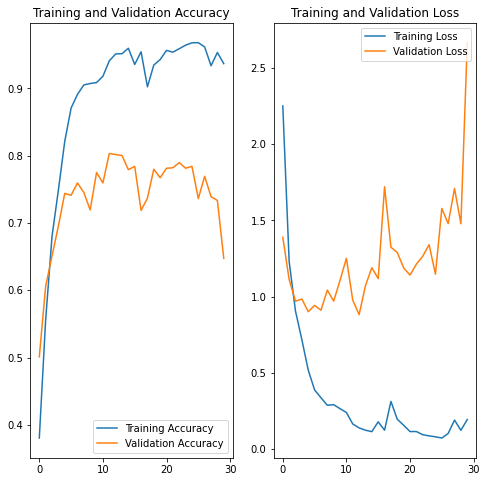

In [37]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



Yes, after augmentor with sample 500 on each class added in training set. **Both training & validation accuracy is improved by 93% & 65%**. 
Model is performing better than previous 2 model seen. But, further model need to fine tune using hyperparameter methods, changing epochs, adding drop out, pooling layer, etc for better accuracy of validation wrt to training accuracy.